#**Handling Outliers**

In [107]:
import pandas as pd

In [108]:
df=pd.read_csv("/content/Titanic.csv")

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [111]:
df["Age"].isnull().sum()

177

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-113-1074d30b2bbb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"].fillna(100))


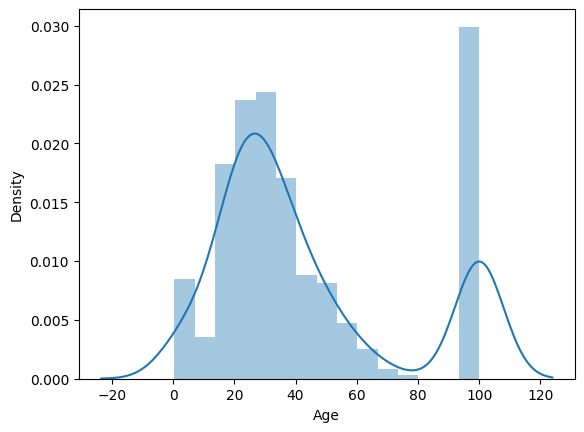

In [113]:
# we fill the missing values in the age column in order to create an outliers
sns.distplot(df["Age"].fillna(100))
plt.show()

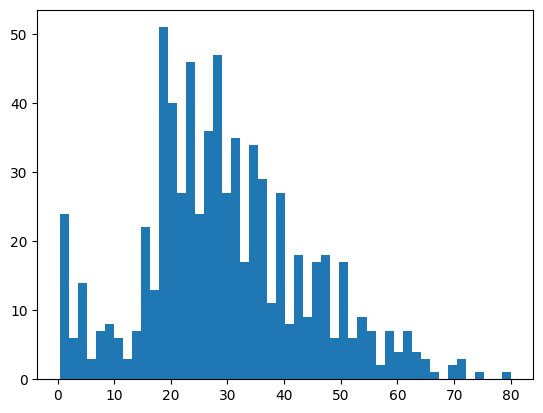

In [114]:
plt.hist(df['Age'],bins=50)
plt.show()

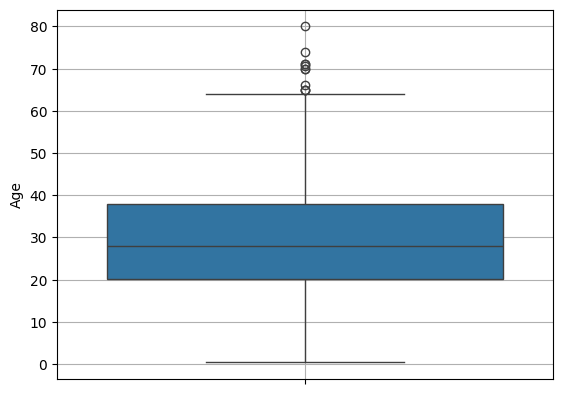

In [115]:
sns.boxplot(y=df["Age"])
plt.grid()
plt.show()

In [116]:
df["Age"].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


#Analysing Outliers:-

###When Features are not Skewed.

####Assuming Age column follows the Gaussian distribution then we will calculate the boundaries that differentiate the outliers

#### Three Standard Deviation: It covers 68%,95%,99% of data according to the standard deviation range.

In [117]:
## 3-standard Deviation
upper_boundary=df['Age'].mean()+3.0*df['Age'].std()
lower_boundary=df['Age'].mean()-3.0*df['Age'].std()
print("upper boundary: ",upper_boundary)
print("lower boundary: ",lower_boundary)
print("mean: ",df['Age'].mean())


upper boundary:  73.27860964406095
lower boundary:  -13.88037434994331
mean:  29.69911764705882


In [118]:
## IQR
IQR=df["Age"].quantile(0.75)-df["Age"].quantile(0.25)
lower_bridge=df["Age"].quantile(0.25)-(1.5*IQR)
upper_bridge=df["Age"].quantile(0.75)+(1.5*IQR)
print("Upper bridge:",upper_bridge)
print("Lower bridge:",lower_bridge)

Upper bridge: 64.8125
Lower bridge: -6.6875


In [119]:
## Extreme Values
IQR=df["Age"].quantile(0.75)-df["Age"].quantile(0.25)
extreme_lower=df["Age"].quantile(0.25)-(3*IQR)
extreme_upper=df["Age"].quantile(0.75)+(3*IQR)
print("Upper bridge:",extreme_upper)
print("Lower bridge:",extreme_lower)

Upper bridge: 91.625
Lower bridge: -33.5


##When feature are skewed.

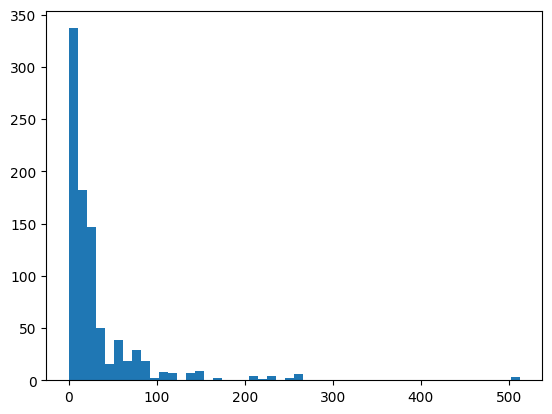

In [120]:
## Fare Feature is skewed
plt.hist(df['Fare'],bins=50)
plt.show()

<ipython-input-121-6a3f09abb6b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


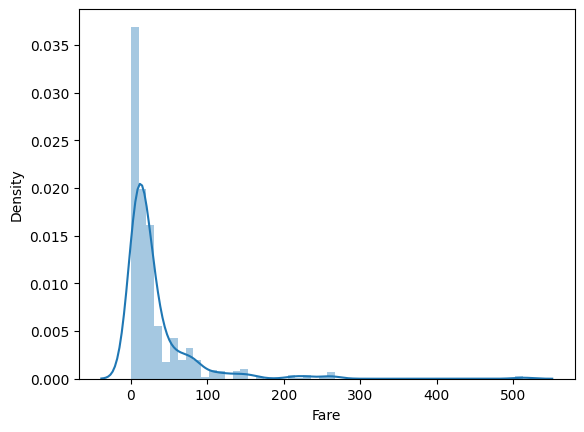

In [121]:
sns.distplot(df['Fare'])
plt.show()

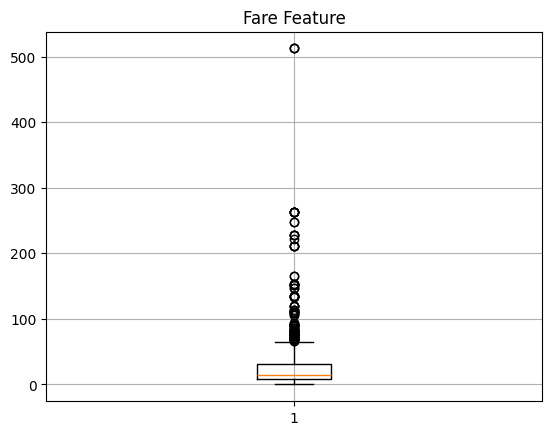

In [122]:
plt.boxplot(df["Fare"])
plt.grid()
plt.title("Fare Feature")
plt.show()

In [123]:
df["Fare"].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


observation:
We see that Fare feature contains outliers and also right skewed.

####IQR

In [124]:
IQR=df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25)
lower_bridge=df["Fare"].quantile(0.25)-(1.5*IQR)
upper_bridge=df["Fare"].quantile(0.75)+(1.5*IQR)
print("Upper bridge:",upper_bridge)
print("Lower bridge:",lower_bridge)

Upper bridge: 65.6344
Lower bridge: -26.724


####Extreme values

In [125]:
IQR=df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25)
extreme_lower=df["Fare"].quantile(0.25)-(3*IQR)
extreme_upper=df["Fare"].quantile(0.75)+(3*IQR)
print("Upper bridge:",extreme_upper)
print("Lower bridge:",extreme_lower)

Upper bridge: 100.2688
Lower bridge: -61.358399999999996


### Handling Outliers

In [126]:
df_copy=df.copy()

In [127]:
## Converting all the values greater than 73 to the 73 in Age Feature
df_copy.loc[df_copy["Age"]>=73,"Age"]=73

In [128]:
df_copy["Age"].max()

73.0

In [129]:
## Converting all the values greater than 100 to the 100 in Fare Feature
df_copy.loc[df_copy["Fare"]>=100,"Fare"]=100

In [130]:
df_copy["Fare"].max()

100.0

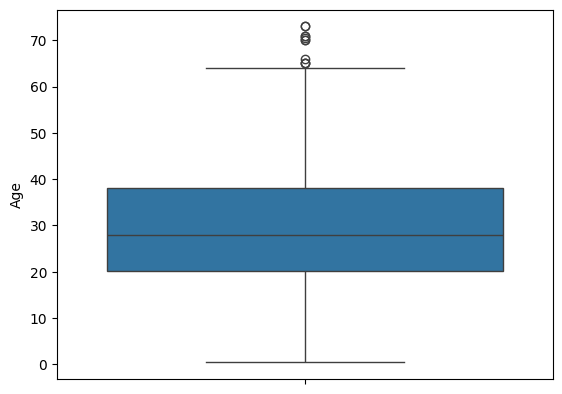

In [131]:
sns.boxplot(df_copy["Age"])
plt.show()

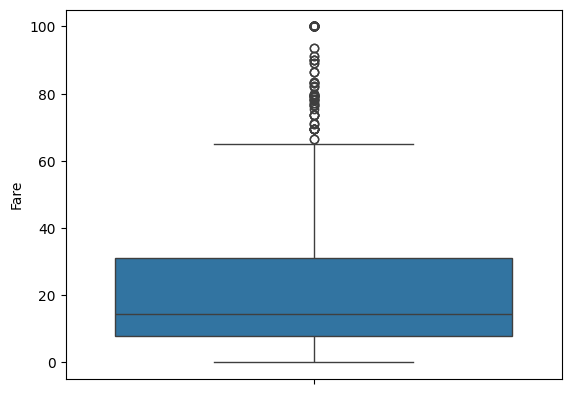

In [132]:
sns.boxplot(df_copy["Fare"])
plt.show()

<ipython-input-133-7ffd2408e216>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy["Age"])


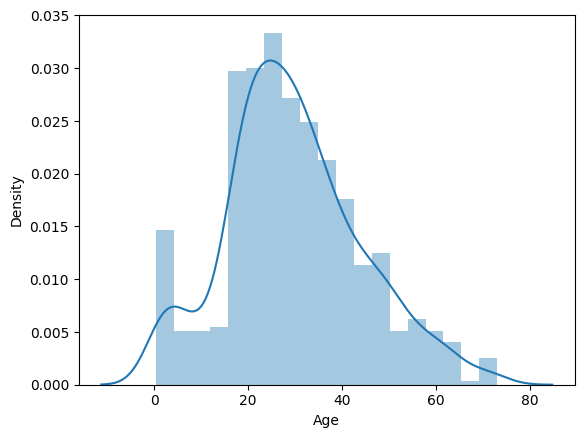

In [133]:
sns.distplot(df_copy["Age"])
plt.show()

<ipython-input-134-902c382c295a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy["Fare"])


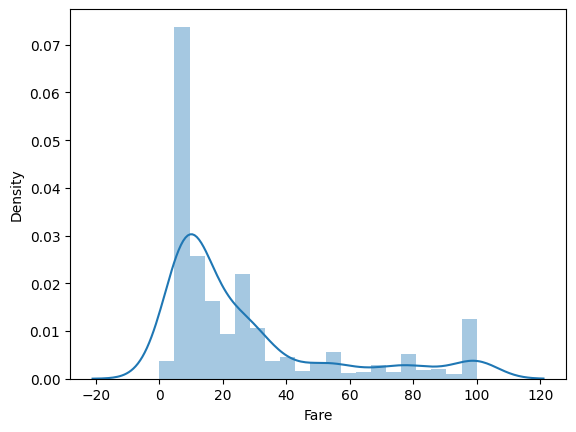

In [134]:
sns.distplot(df_copy["Fare"])
plt.show()

##Model

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

In [136]:
x_train,x_test,y_train,y_test=train_test_split(df_copy[["Age","Fare"]].fillna(0),df["Survived"],test_size=0.3,random_state=42)

##Logistic Regression

In [137]:
Classifier=LogisticRegression()

In [138]:
Classifier.fit(x_train,y_train)

LogisticRegression()

In [139]:
y_pred=Classifier.predict(x_test)

In [140]:
y_pred2=Classifier.predict_proba(x_test)

In [141]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Roc_Score: {roc_auc_score(y_test,y_pred2[:,1])}")


Accuracy Score: 0.6791044776119403
Roc_Score: 0.7471452344063809


## Ensemble Technique

In [142]:
from sklearn.ensemble import RandomForestClassifier


In [143]:
Classifier2=RandomForestClassifier()
Classifier2.fit(x_train,y_train)
y_pred=Classifier2.predict(x_test)
y_pred2=Classifier2.predict_proba(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Roc_Score: {roc_auc_score(y_test,y_pred2[:,1])}")


Accuracy Score: 0.667910447761194
Roc_Score: 0.7023297182532852


##Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
Classifier3=DecisionTreeClassifier()
Classifier3.fit(x_train,y_train)
y_pred=Classifier3.predict(x_test)
y_pred2=Classifier3.predict_proba(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Roc_Score: {roc_auc_score(y_test,y_pred2[:,1])}")


Accuracy Score: 0.6156716417910447
Roc_Score: 0.5987834968726689
